/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.2687 - loss: 1.7800 - val_accuracy: 0.2562 - val_loss: 1.7796
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2495 - loss: 1.7786 - val_accuracy: 0.2562 - val_loss: 1.7793
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2564 - loss: 1.7827 - val_accuracy: 0.2562 - val_loss: 1.7791
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2629 - loss: 1.7782 - val_accuracy: 0.2625 - val_loss: 1.7788
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2495 - loss: 1.7774 - val_accuracy: 0.2625 - val_loss: 1.7786
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2902 - loss: 1.7762 - val_accuracy: 0.2656 - val_loss: 1.7783
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2649 - loss: 1.7796 - val_accuracy: 0.2656 - val_loss: 1.7781
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2713 - loss: 1.7812 - val_accuracy: 0

Test Accuracy: 0.3562
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix:
[[ 1  0  0  0  0  0]
 [ 3  0  3  3  0  1]
 [ 9  3 67 51  0  0]
 [15  2 69 46  0  0]
 [ 1  0 25 16  0  0]
 [ 0  0  2  3  0  0]]


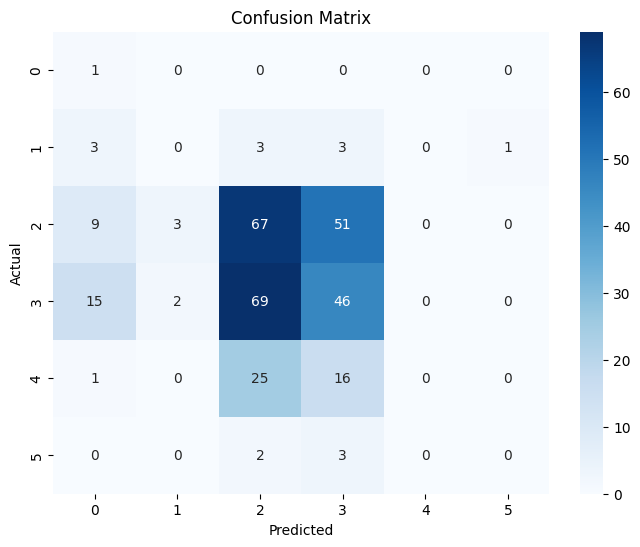

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.03      1.00      0.07         1
           1       0.00      0.00      0.00        10
           2       0.40      0.52      0.45       130
           3       0.39      0.35      0.37       132
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00         5

    accuracy                           0.36       320
   macro avg       0.14      0.31      0.15       320
weighted avg       0.32      0.36      0.34       320

Model Loaded Successfully


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://drive.google.com/uc?export=download&id=1uutPAkOSYb2Uror1mk2dZUtoYbCgz6DO"
data = pd.read_csv(url)

# Splitting features and labels
X = data.drop(columns=['quality'])  # Assuming 'quality' is the target
y = data['quality']

# Convert target into categorical (assuming it's classification)
y = pd.get_dummies(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(20, activation='relu'),
    Dense(25, activation='relu'),
    Dense(10, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer
])

# Compile Model
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save Model
model.save('wine_quality_model.h5')

# Confusion Matrix & Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test.values, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Load Model for Deployment
def load_model():
    model = keras.models.load_model('wine_quality_model.h5')
    return model

deployed_model = load_model()
print("Model Loaded Successfully")
